<h1>1.1 Data Preprocessing (3 Points)</h1>
<h2>1.1.1 Datasets</h2>
You are required to pre-process given datasets.
Airfare and demand: https://users.stat.ufl.edu/~winner/data/airq402.dat Wine Quality: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
<h3>Tasks:</h3>

1. Convert any non-numeric values to numeric values. For example, replace a country name with an integer value or, more appropriately, use hot-one encoding. [Hint: use hashmap (dict) or pandas.get dummies]. Please explain your solution.

In [1542]:
import pandas as pd 
import numpy as np
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# wine quality imports 
wine_quality = fetch_ucirepo(id=186) 
Xdata_wine = wine_quality.data.features 
Ydata_wine = wine_quality.data.targets # quality
wine_quality = pd.concat([Xdata_wine, Ydata_wine], axis = 1)

# Airfare demand imports
column_names = [
    "City1", "City2", "Average_Fare", "Distance", "Avg_Weekly_Passengers",
    "Market_Leading_Airline", "Market_Share", "Avg_Fare_Market_Lead",
    "Low_Price_Airline", "Low_Price_Market_Share", "Low_Price"
]
Airfare_demand = pd.read_fwf(
    'https://users.stat.ufl.edu/~winner/data/airq402.dat',
    names=column_names
)

In [1543]:
# hot-one encoding
non_numeric_columns_Airfare_demand = Airfare_demand.select_dtypes(include=['object']).columns
non_numeric_columns_wine_quality = wine_quality.select_dtypes(include=['object']).columns
non_numeric_columns_X_wine = Xdata_wine.select_dtypes(include=['object']).columns
non_numeric_columns_y_wine = Ydata_wine.select_dtypes(include=['object']).columns

Airfare_demand = pd.get_dummies(Airfare_demand, columns=non_numeric_columns_Airfare_demand)
wine_quality = pd.get_dummies(wine_quality, columns=non_numeric_columns_wine_quality)
Xdata_wine = pd.get_dummies(Xdata_wine, columns=non_numeric_columns_X_wine)
Ydata_wine = pd.get_dummies(Ydata_wine, columns=non_numeric_columns_y_wine)

<i style="color:blue;">I used <code>pd.get_dummies()</code> on categorical columns to apply one-hot encoding, creating binary columns for each category. This approach avoids misinterpretation by the model, which might treat numeric labels (e.g., cities as 1, 2, 3) as having an inherent order, which they don’t.</i>

2. Handle sparse data/missing values.

3. Split the data into a training set (80%) and a test set (20%).

In [1544]:
# Define target and feature data for Airfare dataset
Ydata_Airfare = Airfare_demand['Low_Price']
Xdata_Airfare = Airfare_demand.drop(columns=['Low_Price'])

# Define target and feature data for Wine dataset
Ydata_wine = wine_quality['quality']  # Assuming 'quality' is the target
Xdata_wine = wine_quality.drop(columns=['quality'])

# Step 1: Convert boolean columns to binary (0 and 1) for entire dataset
Xdata_Airfare_binary_encoded = Xdata_Airfare.applymap(lambda x: 1 if x is True else (0 if x is False else x))
Xdata_wine_binary_encoded = Xdata_wine.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Step 2: Normalize numeric columns

# Airfare dataset normalization
numeric_columns_Airfare = Xdata_Airfare_binary_encoded.select_dtypes(include=[np.number]).columns
Xdata_mean_Airfare = Xdata_Airfare_binary_encoded[numeric_columns_Airfare].mean()
Xdata_std_Airfare = Xdata_Airfare_binary_encoded[numeric_columns_Airfare].std()
Xdata_std_Airfare[Xdata_std_Airfare == 0] = 1e-6  # Avoid division by zero
Xdata_Airfare_normalized = Xdata_Airfare_binary_encoded.copy()
Xdata_Airfare_normalized[numeric_columns_Airfare] = (Xdata_Airfare_binary_encoded[numeric_columns_Airfare] - Xdata_mean_Airfare) / Xdata_std_Airfare

# Wine dataset normalization
numeric_columns_wine = Xdata_wine_binary_encoded.select_dtypes(include=[np.number]).columns
Xdata_mean_wine = Xdata_wine_binary_encoded[numeric_columns_wine].mean()
Xdata_std_wine = Xdata_wine_binary_encoded[numeric_columns_wine].std()
Xdata_std_wine[Xdata_std_wine == 0] = 1e-6  # Avoid division by zero
Xdata_wine_normalized = Xdata_wine_binary_encoded.copy()
Xdata_wine_normalized[numeric_columns_wine] = (Xdata_wine_binary_encoded[numeric_columns_wine] - Xdata_mean_wine) / Xdata_std_wine

# Step 3: Replace any remaining NaNs with zero
Xdata_Airfare_normalized_imputed = Xdata_Airfare_normalized.fillna(0)
Xdata_wine_normalized_imputed = Xdata_wine_normalized.fillna(0)

# Step 4: Split the preprocessed dataset into training and testing sets
from sklearn.model_selection import train_test_split

Xtrain_Airfare, Xtest_Airfare, Ytrain_Airfare, Ytest_Airfare = train_test_split(
    Xdata_Airfare_normalized_imputed, Ydata_Airfare, test_size=0.2, random_state=42
)
Xtrain_wine, Xtest_wine, Ytrain_wine, Ytest_wine = train_test_split(
    Xdata_wine_normalized_imputed, Ydata_wine, test_size=0.2, random_state=42
)
Ytrain_wine = Ytrain_wine.values.squeeze()
Ytest_wine = Ytest_wine.values.squeeze()

/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_15401/3803158842.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Xdata_Airfare_binary_encoded = Xdata_Airfare.applymap(lambda x: 1 if x is True else (0 if x is False else x))
/var/folders/wf/36j9qfzs04x5_lyfc2d81f5h0000gn/T/ipykernel_15401/3803158842.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  Xdata_wine_binary_encoded = Xdata_wine.applymap(lambda x: 1 if x is True else (0 if x is False else x))


<h2>1.2 Linear Regression with Gradient Descent (7 Points) </h2>
<h3>Part A (4 Points): Implement Linear Regression with Gradient Descent</h3>
In this part, you are required to implement a linear regression algorithm with gradient descent. For each dataset provided above:

- A set of training data $D_{\text{train}} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(N)}, y^{(N)})\}$, where $x \in \mathbb{R}^M$, $y \in \mathbb{R}$, $N$ is the number of training examples, and $M$ is the number of features.

- The Linear Regression model is given as $\hat{y}_n = \sum_{m=1}^{M} \beta_m x_{m}$.

- The Least Square Loss Function is given as $l(x, y) = \sum_{n=1}^{N} (y_n - \hat{y}_n)^2$.

- Minimize the loss function $l(x, y)$ using the Gradient Descent algorithm. Implement functions `learn-linregGD` and `minimize-GD`. Choose $i_{\text{max}}$ between 100 to 1000.

- Choose three suitable values for the step length $\alpha > 0$. For each step length:

  - In each iteration of the `minimize-GD` algorithm, calculate $|f(x_{i-1}) - f(x_i)|$ and, at the end of learning, plot it against the iteration number $i$. Explain the graph.

  - In each iteration step, also calculate the RMSE on the test set $ \text{RMSE} = \sqrt{\frac{1}{T} \sum_{q=1}^{T} (y_q^{\text{test}} - \hat{y}_q)^2} $ and, at the end of learning, plot it against the iteration number $i$. Explain the graph.


In [1545]:
def least_square_loss(X, y, beta):
    # Calculate predictions using the linear model: ŷ = X @ beta
    predictions = X @ beta
    
    # Compute the residual errors (differences between actual and predicted values)
    residuals = y - predictions
    
    # Return the total least squares loss: sum of squared residuals
    return np.sum(residuals ** 2)

In [1546]:
def f(X, y, betas):
    errors = y - X @ betas
    return np.dot(errors.T, errors)

In [1547]:
def grad(f, X, y, betas, h): # Gradient function with X and y as arguments

    gradient = np.zeros_like(betas, dtype=float)
    for i in range(len(betas)):
        betas_step = np.copy(betas)
        betas_step[i] += h  # increment betas[i] by h
        gradient[i] = (f(X, y, betas_step) - f(X, y, betas)) / h  # partial derivative
    
    return gradient

def analytical_grad(X, y, betas):
    # Ensure `y` is a 1D array
    y = y.squeeze()
    return -2 * X.T @ (y - X @ betas)

In [1548]:
def alpha_f(f, X, y, betas, d, delta, method, alpha): # delta -> minimum steepness
    if method == 'Fix':
        return alpha
    if method == 'Armijo rule':
        return step_length_armijo(f, X, y, betas, d, delta)
    if method == 'Bold driver':
        return step_length_bolddriver(f, X, y, betas, d, alpha, alpha_plus=1.1, alpha_minus=0.5)
    else: 
        return ValueError("Choose either 'Armijo rule' or 'Bold driver' method!")

Komment:
1. f(x)−f(x+αlpha * d) -> actual decrease in function value after moving a step of size alpha in direction d
2. alpha * delta * d.T * d -> minimum acceptable decrease, which is a fraction (determined by delta) of the squared norm of d scaled by alpha

Impact of delta: 
- Lower delta: larger steps are allowed, potentially faster but riskier.
- Higher delta: smaller steps are forced, likely safer but slower.

In [1549]:
def predict_y(X, betas):
    return X @ betas

In [1550]:
# Plot function for metrics
def plot_metrics(cost_diffs, rmse_values, method):
    plt.figure(figsize=(6, 4))
    plt.plot(cost_diffs, label='|f(x_{i-1}) - f(x_i)|')
    plt.title(f'{method}: Change in Function Value Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('|f(x_{i-1}) - f(x_i)|')
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(rmse_values, label='RMSE on Test Set')
    plt.title(f'{method}: RMSE on Test Set Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

In [1551]:
def minimize_GD(f, x_0, Xtrain, Ytrain, Xtest, Ytest, alpha_, i_max, epsilon, max_gradient_norm, patience, method, delta):
    
    x_i = x_0  # Initial betas
    costs = []
    cost_diffs = []  # |f(x_{i-1}) - f(x_i)| values for each iteration
    rmse_values = []  # RMSE values for each iteration
    best_rmse = float('inf')
    patience_counter = 0
    
    for i in range(1, int(i_max) + 1):
        # Use analytical gradient
        d = - analytical_grad(Xtrain, Ytrain, x_i)
        
        # Clip gradient norm
        gradient_norm = np.linalg.norm(d)
        if gradient_norm > max_gradient_norm:
            d = d / gradient_norm * max_gradient_norm
        
        # Step length strategy
        alpha = alpha_f(f, Xtrain, Ytrain, x_i, d, delta, method, alpha_)
                
        # Update parameters
        x_i_next = x_i + alpha * d
        
        # Calculate and store cost
        cost = f(Xtrain, Ytrain, x_i)
        costs.append(cost)
        
        # |f(x_{i-1}) - f(x_i)|
        cost_diff = abs(f(Xtrain, Ytrain, x_i) - f(Xtrain, Ytrain, x_i_next))
        cost_diffs.append(cost_diff)
        
        # RMSE on test set
        y_pred = Xtest @ x_i  # Predicted values for the test set
        rmse_test = np.sqrt(np.mean((Ytest - y_pred) ** 2))
        rmse_values.append(rmse_test)
        
        # Early stopping check
        if rmse_test < best_rmse:
            best_rmse = rmse_test
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at iteration {i} due to no improvement in RMSE for {patience} iterations.")
                break

        # Convergence check
        if cost_diff < epsilon:
            print(f"Converged in {i} iterations")
            break
        x_i = x_i_next
    
    # Plot cost difference and RMSE
    plot_metrics(cost_diffs, rmse_values, method)

    return x_i, costs

In [1552]:
def learn_linregGD(Xtrain, Ytrain, Xtest, Ytest, alpha, i_max, epsilon, max_gradient_norm, patience, method, delta):
    # Ensure Ytrain is 1D
    y = Ytrain.squeeze()  # Remove .values, as Ytrain is already a numpy array
    # Initialize `betas_0` with the correct shape based on the input dataset
    betas_0 = np.random.uniform(low=-0.01, high=0.01, size=Xtrain.shape[1])  # Updated to Xtrain's shape
    # Run gradient descent with the provided parameters
    betas, costs = minimize_GD(f, betas_0, Xtrain, Ytrain, Xtest, Ytest, alpha, i_max, epsilon, max_gradient_norm, patience, method, delta)
    return betas, costs

Running Gradient Descent with alpha = 0.0001
Early stopping at iteration 4730 due to no improvement in RMSE for 200 iterations.


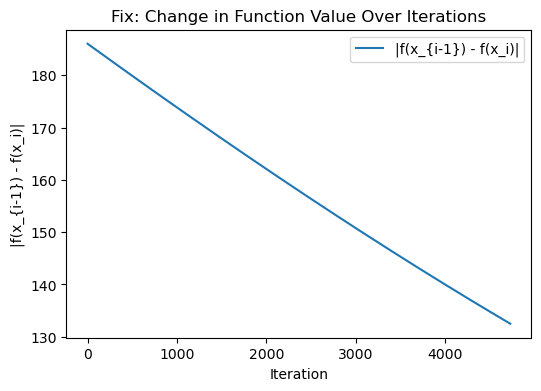

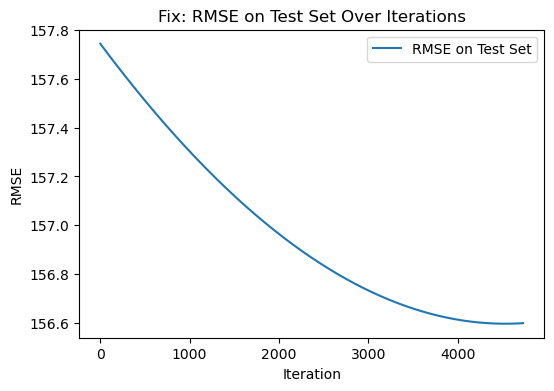

Learned coefficients: Average_Fare             3.107515
Distance                 1.920936
Avg_Weekly_Passengers   -1.231966
Market_Share            -0.859301
Avg_Fare_Market_Lead     2.914219
                           ...   
Low_Price_Airline_TZ    -0.739546
Low_Price_Airline_UA     0.405704
Low_Price_Airline_US     0.490652
Low_Price_Airline_WN    -1.021100
Low_Price_Airline_YX     0.479586
Length: 216, dtype: float64
Running Gradient Descent with alpha = 0.001
Early stopping at iteration 654 due to no improvement in RMSE for 200 iterations.


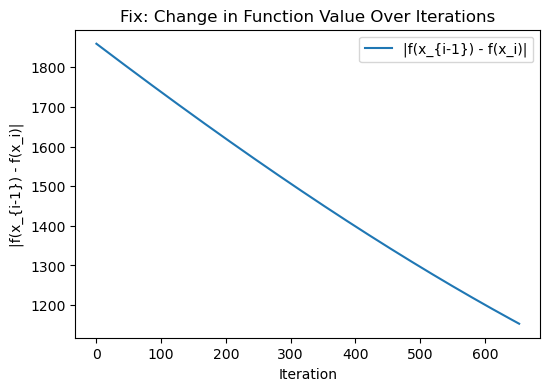

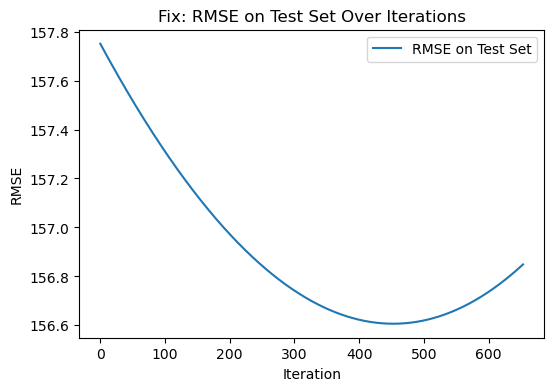

Learned coefficients: Average_Fare             4.253206
Distance                 2.606568
Avg_Weekly_Passengers   -1.750177
Market_Share            -1.128873
Avg_Fare_Market_Lead     3.963474
                           ...   
Low_Price_Airline_TZ    -1.046457
Low_Price_Airline_UA     0.521648
Low_Price_Airline_US     0.662277
Low_Price_Airline_WN    -1.299619
Low_Price_Airline_YX     0.698492
Length: 216, dtype: float64
Running Gradient Descent with alpha = 0.01
Early stopping at iteration 246 due to no improvement in RMSE for 200 iterations.


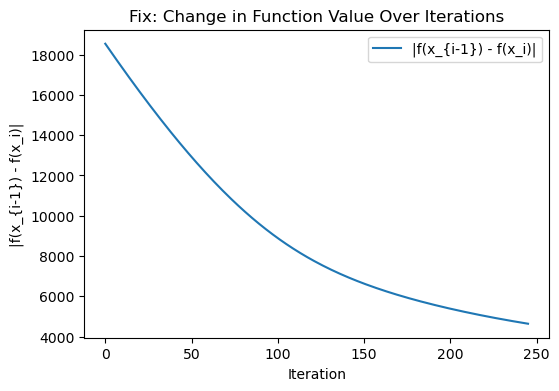

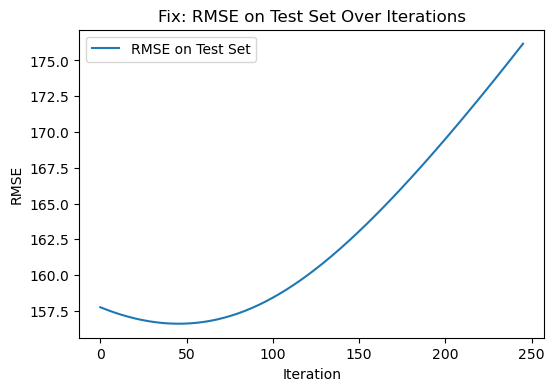

Learned coefficients: Average_Fare             11.469477
Distance                  6.475006
Avg_Weekly_Passengers    -7.092103
Market_Share             -2.319981
Avg_Fare_Market_Lead      9.906595
                           ...    
Low_Price_Airline_TZ     -4.455581
Low_Price_Airline_UA      0.049322
Low_Price_Airline_US      1.228929
Low_Price_Airline_WN     -1.047556
Low_Price_Airline_YX      2.974625
Length: 216, dtype: float64


In [1553]:
betas_0 = np.zeros(Xtrain_Airfare.shape[1])
i_max = 6000
epsilon = 1e-7
max_gradient_norm = 15
patience = 200  # Early stopping patience
method = 'Fix'
delta = 0.3

alphas = [1e-4, 1e-3, 1e-2]  # step lengths
for alpha in alphas:
    print(f"Running Gradient Descent with alpha = {alpha}")
    beta_opt, costs = learn_linregGD(Xtrain_Airfare, Ytrain_Airfare, Xtest_Airfare, Ytest_Airfare, 
                                    alpha, i_max, epsilon, max_gradient_norm, patience, method, delta)
    print("Learned coefficients:", beta_opt)

Running Gradient Descent with alpha = 0.0001
Early stopping at iteration 314 due to no improvement in RMSE for 200 iterations.


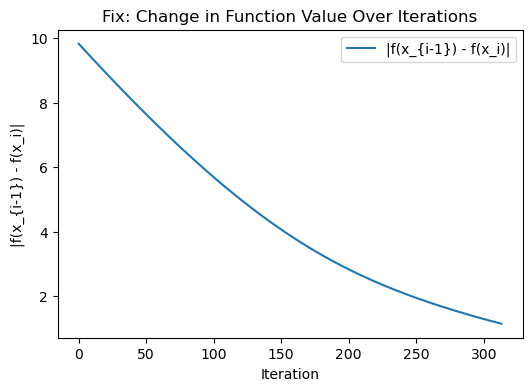

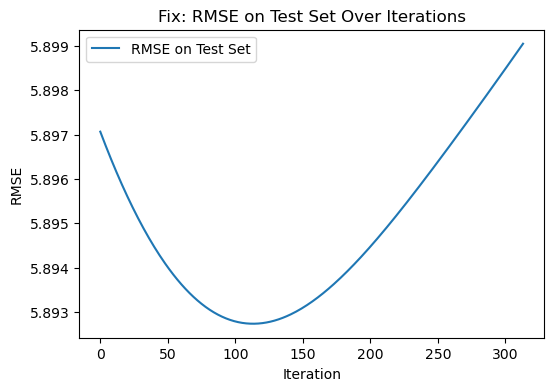

Learned coefficients: fixed_acidity          -0.053585
volatile_acidity       -0.226928
citric_acid             0.085817
residual_sugar          0.103062
chlorides              -0.076933
free_sulfur_dioxide     0.053476
total_sulfur_dioxide   -0.138448
density                -0.096430
pH                     -0.010310
sulphates               0.118938
alcohol                 0.242462
dtype: float64
Running Gradient Descent with alpha = 0.001
Early stopping at iteration 212 due to no improvement in RMSE for 200 iterations.


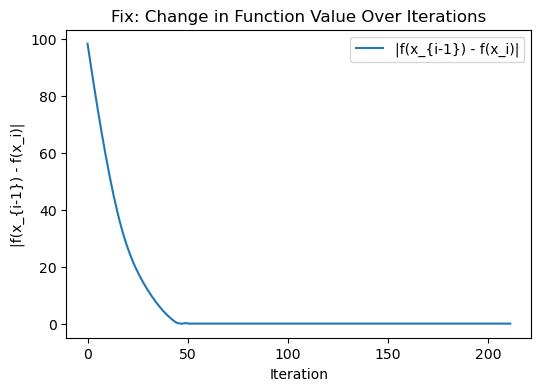

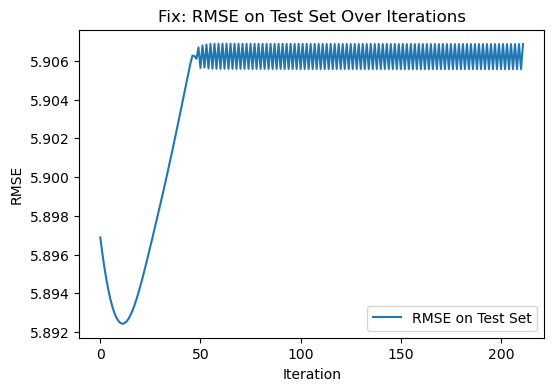

Learned coefficients: fixed_acidity          -0.059434
volatile_acidity       -0.280228
citric_acid             0.075609
residual_sugar          0.211144
chlorides              -0.068632
free_sulfur_dioxide     0.146237
total_sulfur_dioxide   -0.299870
density                -0.139985
pH                     -0.006801
sulphates               0.148923
alcohol                 0.246070
dtype: float64
Running Gradient Descent with alpha = 0.01
Early stopping at iteration 202 due to no improvement in RMSE for 200 iterations.


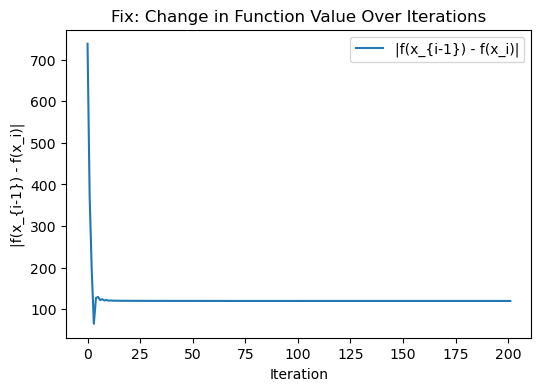

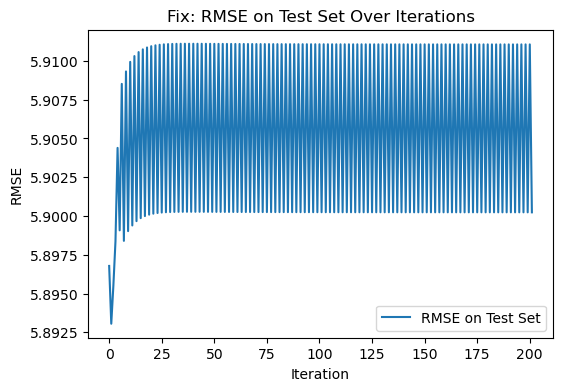

Learned coefficients: fixed_acidity          -0.033266
volatile_acidity       -0.240036
citric_acid             0.060158
residual_sugar          0.172620
chlorides              -0.037283
free_sulfur_dioxide     0.099607
total_sulfur_dioxide   -0.352904
density                -0.136166
pH                      0.016566
sulphates               0.181660
alcohol                 0.258916
dtype: float64


In [1554]:
alphas = [1e-4, 1e-3, 1e-2]  # step lengths
for alpha in alphas:
    print(f"Running Gradient Descent with alpha = {alpha}")
    beta_opt, costs = learn_linregGD(Xtrain_wine, Ytrain_wine, Xtest_wine, Ytest_wine, 
                                    alpha, i_max, epsilon, max_gradient_norm, patience, method, delta)
    print("Learned coefficients:", beta_opt)

<h2>Part B (3 Points): Step Length for Gradient Descent</h2>

This task is based on Part A. Implement two algorithms: `steplength-armijo` and `steplength-bolddriver` as described below. For each step length algorithm:

- In each iteration of the `minimize-GD` algorithm, calculate $|f(x_{i-1}) - f(x_i)|$ and, at the end of learning, plot it against the iteration number $i$. Explain the graph.

- In each iteration step, also calculate the RMSE on the test set and plot it against the iteration number $i$. Explain the graph.

Compare different step length algorithms. Compare the RMSE graphs of `steplength-armijo` and `steplength-bolddriver` with the three fixed step lengths. Explain your graph.


In [1555]:
# Armijo step length function
def step_length_armijo(f, X, y, betas, d, delta):
    alpha = 1
    while (f(X, y, betas) - f(X, y, betas + alpha * d)) < alpha * delta * np.dot(d, d):
        alpha /= 2
    return alpha

def step_length_bolddriver(f, x, y, betas, d, alpha_old, alpha_plus=1.1, alpha_minus=0.5):
    alpha = alpha_old * alpha_plus
    
    # Check if the function value is decreasing, and if not, reduce alpha
    while f(x, y, betas) - f(x + alpha * d, y, betas) <= 0:
        alpha *= alpha_minus  # Reduce the step length
    
    return alpha

Running Gradient Descent with alpha = 0.0001
Early stopping at iteration 202 due to no improvement in RMSE for 200 iterations.


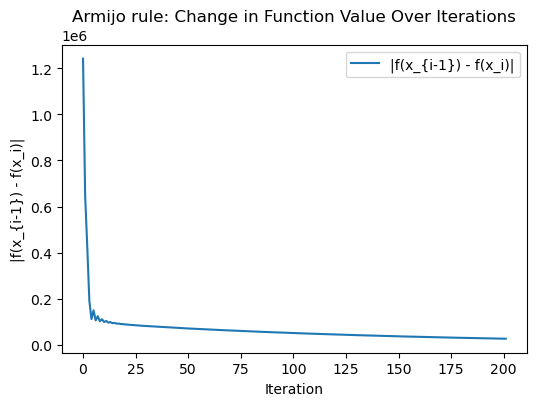

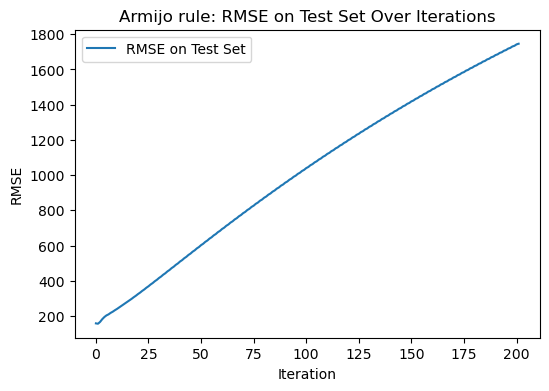

Learned coefficients: (Armijo rule) Average_Fare             40.405321
Distance                  0.381880
Avg_Weekly_Passengers   -13.616957
Market_Share             -3.889799
Avg_Fare_Market_Lead    -13.415983
                           ...    
Low_Price_Airline_TZ     -4.229527
Low_Price_Airline_UA     -1.257221
Low_Price_Airline_US     -0.531105
Low_Price_Airline_WN      1.613804
Low_Price_Airline_YX      5.943632
Length: 216, dtype: float64
Running Gradient Descent with alpha = 0.0001
Early stopping at iteration 4310 due to no improvement in RMSE for 200 iterations.


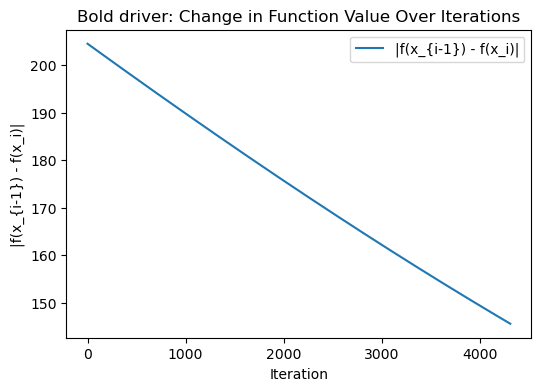

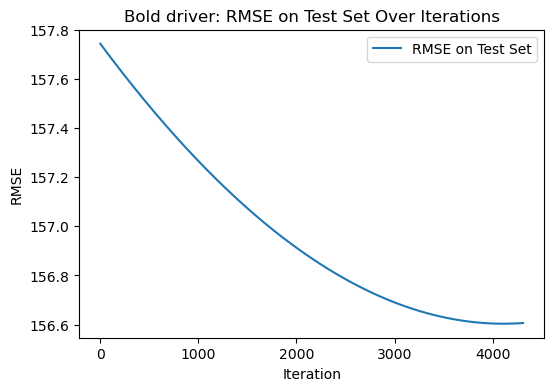

Learned coefficients: (Bold driver) Average_Fare             3.120898
Distance                 1.928291
Avg_Weekly_Passengers   -1.242483
Market_Share            -0.854335
Avg_Fare_Market_Lead     2.921102
                           ...   
Low_Price_Airline_TZ    -0.737723
Low_Price_Airline_UA     0.397582
Low_Price_Airline_US     0.486272
Low_Price_Airline_WN    -1.020659
Low_Price_Airline_YX     0.496175
Length: 216, dtype: float64


In [1556]:
method = 'Armijo rule'
alpha = 1e-4
print(f"Running Gradient Descent with alpha = {alpha}")
beta_opt, costs = learn_linregGD(Xtrain_Airfare, Ytrain_Airfare, Xtest_Airfare, Ytest_Airfare, 
                                    alpha, i_max, epsilon, max_gradient_norm, patience, method, delta)
print("Learned coefficients: (Armijo rule)", beta_opt)

method = 'Bold driver'
alpha = 1e-4
print(f"Running Gradient Descent with alpha = {alpha}")
beta_opt, costs = learn_linregGD(Xtrain_Airfare, Ytrain_Airfare, Xtest_Airfare, Ytest_Airfare, 
                                    alpha, i_max, epsilon, max_gradient_norm, patience, method, delta)
print("Learned coefficients: (Bold driver)", beta_opt)

These observations emphasize a trade-off: Bold Driver provides reliable stability, while Armijo optimizes early-stage efficiency but may introduce oscillations near the solution​